In [0]:
import sys
import os
from google.colab import drive
base_dir = './drive/My Drive/study/grad_cam'
sys.path.append(base_dir)
drive.mount('/content/drive')

!apt -y -q install cuda-libraries-dev-9-2
!pip install -q cupy-cuda92 chainer

!apt-get install graphviz
!pip install 'chaineripy'
!pip install 'chainercv'


import shutil

from chainer.datasets import cifar
from chainer import serializers
import matplotlib.pyplot as plt

import numpy as np

from resnet.networks.resnet import ResNet101
from backprop import *
from utils import *
from run import *

# Dataset setup
train_val, test = cifar.get_cifar10(scale=255.)
train_size      = int(len(train_val) * 0.9)
train, valid    = split_dataset_random(train_val, train_size, seed=0)

mean = np.mean([x for x, _ in train], axis=(0, 2, 3))
std  = np.std([x for x, _ in train], axis=(0, 2, 3))

if not os.path.exists("/root/.chainer/dataset/pfnet/chainer/models"):
    os.mkdir("/root/.chainer/dataset/pfnet/chainer/models")

shutil.copyfile('drive/My Drive/study/resnet/caffe/ResNet-101-model.caffemodel', 
                "/root/.chainer/dataset/pfnet/chainer/models/ResNet-101-model.caffemodel")


In [0]:
gpu_id = 0
model = resnet.ResNetTest101(10, 227)
if gpu_id >= 0:
    model.to_gpu(gpu_id)
trainer_dir = 'drive/My Drive/study/result/model_epoch-11'
serializers.load_npz(trainer_dir, model)

img = valid[7]
x, lab = transform(img, mean, std, output_size=(227, 227))
layer = 'res5'

gbp = calc_gbp(x, lab, model, layer)
gcam = calc_gcam(x, lab, model, layer)

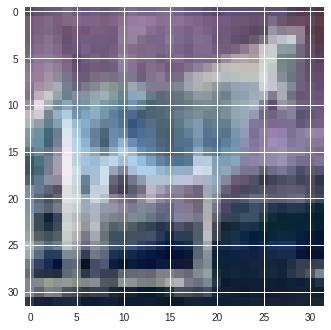

In [16]:
plt.imshow(img[0].transpose(1, 2, 0))

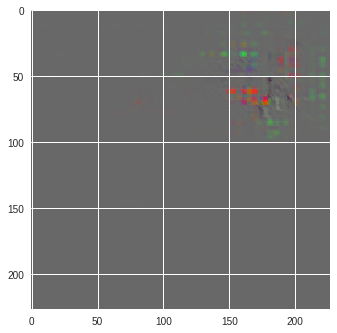

In [9]:
ggcam = gbp * gcam[:, :, np.newaxis]
ggcam = normalize(ggcam)
plt.imshow(cv2.cvtColor(ggcam, cv2.COLOR_BGR2RGB))

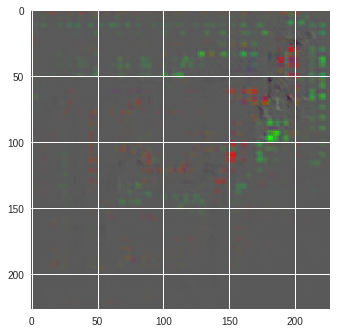

In [10]:
gbp = normalize(gbp)
plt.imshow(cv2.cvtColor(gbp, cv2.COLOR_BGR2RGB))

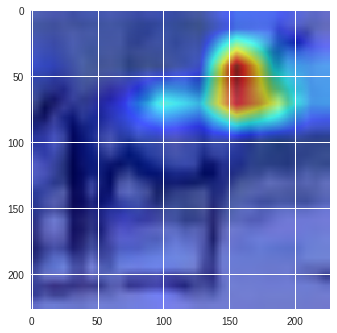

In [11]:
heatmap = cv2.applyColorMap(gcam, cv2.COLORMAP_JET)
src = cv2.resize(img[0].transpose(1, 2, 0), (model.size, model.size))
gcam = np.float32(src) + np.float32(heatmap)
gcam = normalize(gcam)
plt.imshow(cv2.cvtColor(gcam, cv2.COLOR_BGR2RGB))

In [0]:
gpu_id = 0
model = ResNet101()
if gpu_id >= 0:
    model.to_gpu(gpu_id)
model.size = 224

url = 'https://raw.githubusercontent.com/tsurumeso/chainer-grad-cam/master/images/dog_cat.png'
src = imread_web(url)
src = src[:, :, ::-1]
src = cv2.resize(src, (model.size, model.size))
x = src.astype(np.float32) - np.float32([103.939, 116.779, 123.68])
x = x.transpose(2, 0, 1)[np.newaxis, :, :, :]
label = 242
layer = 'res5'
gbp = calc_gbp(x, label, model, layer)
gcam = calc_gcam(x, label, model, layer)


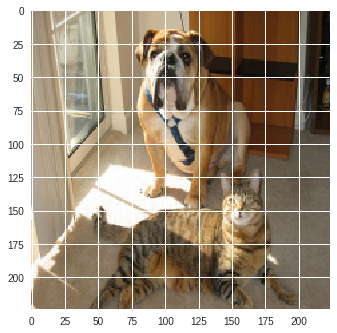

In [17]:
plt.imshow(src)

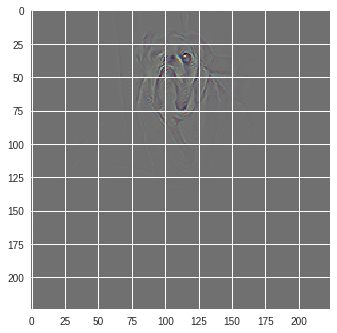

In [13]:
ggcam = gbp * gcam[:, :, np.newaxis]
ggcam = normalize(ggcam)
plt.imshow(cv2.cvtColor(ggcam, cv2.COLOR_BGR2RGB))

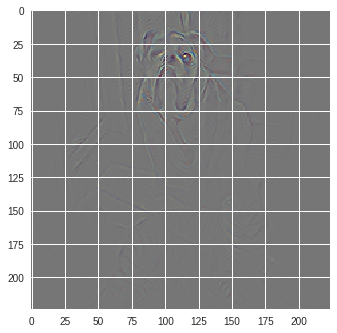

In [14]:
gbp = normalize(gbp)
plt.imshow(cv2.cvtColor(gbp, cv2.COLOR_BGR2RGB))

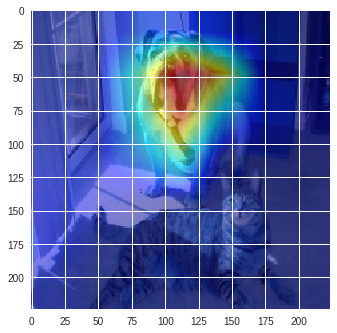

In [15]:
heatmap = cv2.applyColorMap(gcam, cv2.COLORMAP_JET)
gcam = np.float32(src) + np.float32(heatmap)
gcam = normalize(gcam)
plt.imshow(cv2.cvtColor(gcam, cv2.COLOR_BGR2RGB))